# Data curation

## Finding the Data

### Import some necessary functions

In [1]:
import os, pydicom
import numpy as np
import SimpleITK as sitk
from Distribute_Patients import Separate_files
from Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT import DicomImagestoData, plot_scroll_Image

### Find where we put our data

In [3]:
data_path = os.path.join('..','Data','Whole_Patients')
print('We have ' + str(len(os.listdir(data_path))) + ' patients!')

We have 20 patients!


## Ensuring contour fidelity...

### What are the contour names we have?

Note that we've set 'get_images_mask' to False, this means we won't be getting any of the image data, just looking at the dicom RT files

In [4]:
Dicom_Reader = DicomImagestoData(path=data_path,get_images_mask=False) # Set the get_images_mask to False so it will be fast

['RS_MRNMED_LYMPH_063_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNABD_LYMPH_007_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNMED_LYMPH_024_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNABD_LYMPH_033_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_017_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNABD_LYMPH_019_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_055_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNMED_LYMPH_073_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNABD_LYMPH_069_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNABD_LYMPH_028_1.2.752.243.1.1.20190411110641822.1200.551541.dcm']
['RS_MRNMED_LYMPH_075_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_029_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_069_1.2.752.243.1.1.20190411110641822.1200.55154.dcm']
['RS_MRNMED_LYMPH_002_1.2.752.243.1.1.20190411

### View ROI names

#### This will tell us all the unique roi names, hence all_rois

In [5]:
for roi in Dicom_Reader.all_rois:
    print(roi)

Liver
bma_liver
best_liver
tried_liver
Liver_BMA_Program_4


## Make contour associations

#### We have quite a few contour names here.. now, we can either change the ROI names in the RT files, or make an associations file

#### The associations file associates a contour name with another one {'Current contour':'Desired name'}

In [6]:
associations = {'Liver_BMA_Program_4':'Liver',
                'bma_liver':'Liver',
                'best_liver':'Liver',
                'tried_liver':'Liver'}

### Re-write RTs
#### This is commented out, because if I run it, then the example above won't show any different contour names

In [ ]:
# Dicom_Reader.associations = associations
# for RT in Dicom_Reader.all_RTs:
#     Dicom_Reader.rewrite_RT(RT)

## Pulling images and mask

### We'll first do this with one patient

In [7]:
patient_data_path = os.path.join(data_path,'ABD_LYMPH_036')
Dicom_Reader = DicomImagestoData(path=patient_data_path,get_images_mask=True,associations=associations)
print('Done!')

Done!


In [8]:
print(Dicom_Reader.rois_in_case)

['Liver_BMA_Program_4']


In [9]:
Dicom_Reader.get_mask(['Liver']) # Tell the class to load up the mask with contour name 'Liver'
print('Done')

Done


## View images

In [10]:
%matplotlib inline

### The images and mask are saved within the Dicom_Reader class, so we just have to load them

In [11]:
Images = Dicom_Reader.ArrayDicom
mask = Dicom_Reader.mask # This is the mask

#### Threshold

In [12]:
Images[Images<-200] = -200
Images[Images>200] = 200

<IPython.core.display.Javascript object>


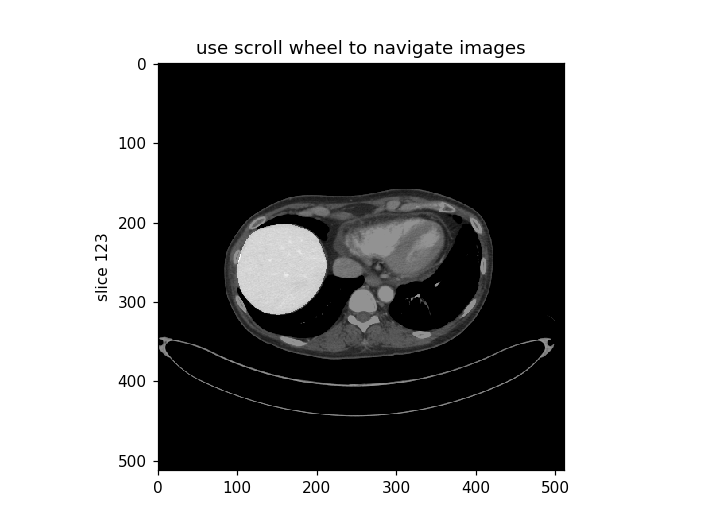

(<Figure size 640x480 with 1 Axes>,
 <Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT.IndexTracker at 0x1aa555a9320>)

In [15]:
plot_scroll_Image(Images)

In [14]:
Images[mask==1] += 300

## Recap

### Checking ROI contour names and making associations

### Loading in image and mask from desired contour name

### Viewing images and mask

In [ ]:
def write_data(data_path, out_path, associations):
    for patient in os.listdir(data_path):
        print(patient)
        patient_data_path = os.path.join(data_path,patient)
        out_file = os.path.join(out_path,patient+'.txt')
        if not os.path.exists(out_file):
            Dicom_Reader = DicomImagestoData(path=patient_data_path,get_images_mask=True,associations=associations)
            image_handle = Dicom_Reader.dicom_handle
            Dicom_Reader.get_mask(['Liver']) # Tell the class to load up the mask with contour name 'Liver'
            mask_handle = Dicom_Reader.mask_handle
            num_images = image_handle.GetSize()[-1]
            for i in range(num_images):
                out_write_image = os.path.join(out_path, patient + '_' + str(i) + '_image.nii.gz')
                sitk.WriteImage(image_handle[:,:,i],out_write_image)
                sitk.WriteImage(mask_handle[:,:,i],out_write_image.replace('_image.','_annotation.'))
            fid = open(out_file,'w+')
            fid.close()
    return None

In [15]:
input_path = os.path.join('..','Data','Whole_Patients')
output_path = os.path.join('..','Data','Niftii_Arrays')
#write_data(input_path,output_path,associations=associations)

In [16]:
Separate_files(output_path) # Separate into a Training/Validation/Test set

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: '..\\Data\\Niftii_Arrays\\MED_LYMPH_024_36_annotation.nii.gz' -> '..\\Data\\Niftii_Arrays\\Train\\MED_LYMPH_024_36_annotation.nii.gz'